In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mujahidashraf/data/refs/heads/main/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#K Nearest Neighbor
1. KNN Theory

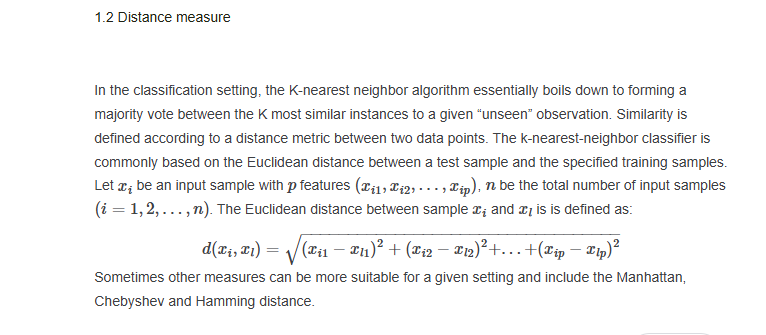

1.3 Algorithm steps
STEP 1: Cgoose the number K of neighbors

STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

STEP 3: Among these K neighbors, count the number of data points to each category

STEP 4: Assign the new data point to the category where you counted the most neighbors

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.groupby('Species').size()

,0
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values
y = df['Species'].values

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = classifier.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9667
Training-set accuracy score: 0.9667


#Classification metrices

##Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


<Axes: >

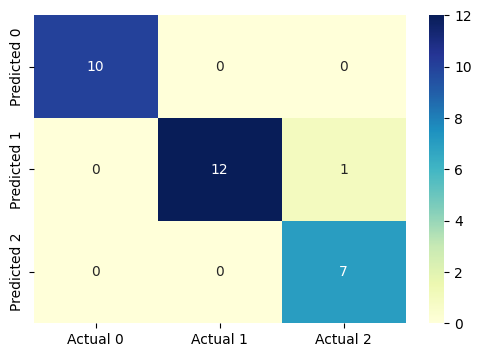

In [ ]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual 0', 'Actual 1', 'Actual 2'],
                         index=['Predicted 0', 'Predicted 1', 'Predicted 2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

for i in range(len(cm)):
    print(f"\nClass {i}:")
    TP, FN, FP, TN = confusion_matrix_for(i, cm).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')




    classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
    print('Classification accuracy  : {0:0.4f}'.format(classification_accuracy))

    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    print('Classification error : {0:0.4f}'.format(classification_error))

    precision = TP / float(TP + FP)
    print('Precision : {0:0.4f}'.format(precision))

    recall = TP / float(TP + FN)
    print('Recall or Sensitivity : {0:0.4f}'.format(recall))

    f1 = (2*precision*recall)/float(precision+recall)
    print('F1 : {0:0.4f}'.format(f1))

    true_positive_rate = TP / float(TP + FN)
    print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

    false_positive_rate = FP / float(FP + TN)
    print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

    specificity = TN / (TN + FP)
    print('Specificity : {0:0.4f}'.format(specificity)) #also known as true negtive rate


Class 0:
TP: 10, FN: 0, FP: 0, TN: 20
Classification accuracy  : 1.0000
Classification error : 0.0000
Precision : 1.0000
Recall or Sensitivity : 1.0000
F1 : 1.0000
True Positive Rate : 1.0000
False Positive Rate : 0.0000
Specificity : 1.0000

Class 1:
TP: 12, FN: 1, FP: 0, TN: 17
Classification accuracy  : 0.9667
Classification error : 0.0333
Precision : 1.0000
Recall or Sensitivity : 0.9231
F1 : 0.9600
True Positive Rate : 0.9231
False Positive Rate : 0.0000
Specificity : 1.0000

Class 2:
TP: 7, FN: 0, FP: 1, TN: 22
Classification accuracy  : 0.9667
Classification error : 0.0333
Precision : 0.8750
Recall or Sensitivity : 1.0000
F1 : 0.9333
True Positive Rate : 1.0000
False Positive Rate : 0.0435
Specificity : 0.9565


In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

knn3 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn3,param_grid,cv=5)
knn_cv.fit(X_test,y_test)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9666666666666666
Best Parameters: {'n_neighbors': np.int64(2)}


In [ ]:
k_list = list(range(1,60))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') #https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

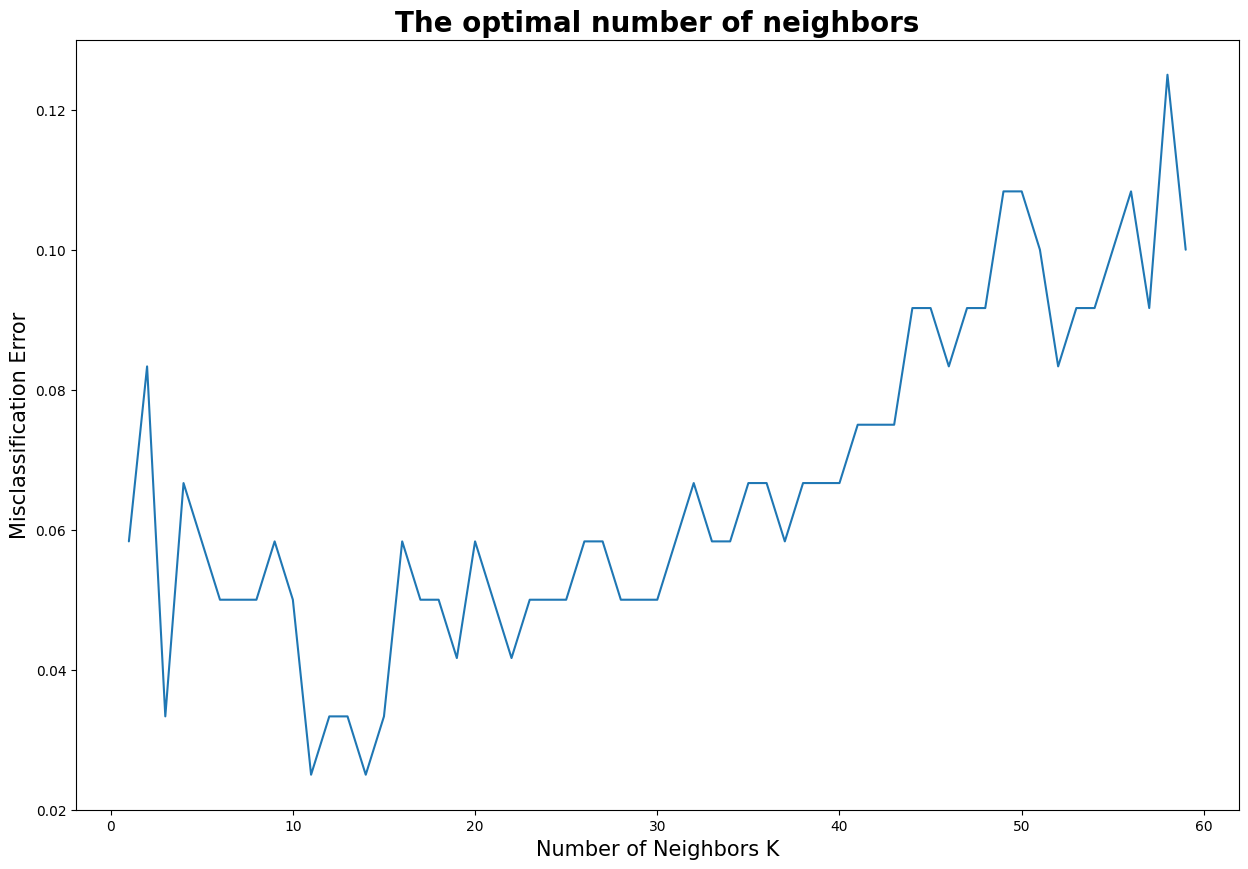

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
#plt.plot(k_list, cv_scores)

plt.show()

In [ ]:
#best_k = k_list[MSE.index(min(MSE))]
best_k = k_list[cv_scores.index(max(cv_scores))]

print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 11.


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=best_k) #class sklearn.neighbors.KNeighborsClassifier
#(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]
#weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))
y_pred_train1 = classifier.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train1)))

Model accuracy score: 1.0000
Training-set accuracy score: 0.9750


In [ ]:

accuracy = accuracy_score(y_test,y_pred1)


precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')

report = classification_report(y_test, y_pred1)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))
print()

print("Classification Report:\n", report)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)

print('Confusion matrix\n\n', cm1)

Confusion matrix

 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [ ]:
def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

for i in range(len(cm1)):
    print(f"\nClass {i}:")
    TP, FN, FP, TN = confusion_matrix_for(i, cm1).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')




    classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
    print('Classification accuracy  : {0:0.4f}'.format(classification_accuracy))

    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    print('Classification error : {0:0.4f}'.format(classification_error))

    precision = TP / float(TP + FP)
    print('Precision : {0:0.4f}'.format(precision))

    recall = TP / float(TP + FN)
    print('Recall or Sensitivity : {0:0.4f}'.format(recall))

    f1 = (2*precision*recall)/float(precision+recall)
    print('F1 : {0:0.4f}'.format(f1))

    true_positive_rate = TP / float(TP + FN)
    print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

    false_positive_rate = FP / float(FP + TN)
    print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

    specificity = TN / (TN + FP)
    print('Specificity : {0:0.4f}'.format(specificity))


Class 0:
TP: 10, FN: 0, FP: 0, TN: 20
Classification accuracy  : 1.0000
Classification error : 0.0000
Precision : 1.0000
Recall or Sensitivity : 1.0000
F1 : 1.0000
True Positive Rate : 1.0000
False Positive Rate : 0.0000
Specificity : 1.0000

Class 1:
TP: 13, FN: 0, FP: 0, TN: 17
Classification accuracy  : 1.0000
Classification error : 0.0000
Precision : 1.0000
Recall or Sensitivity : 1.0000
F1 : 1.0000
True Positive Rate : 1.0000
False Positive Rate : 0.0000
Specificity : 1.0000

Class 2:
TP: 7, FN: 0, FP: 0, TN: 23
Classification accuracy  : 1.0000
Classification error : 0.0000
Precision : 1.0000
Recall or Sensitivity : 1.0000
F1 : 1.0000
True Positive Rate : 1.0000
False Positive Rate : 0.0000
Specificity : 1.0000
